## INFX574 Problem Set 4 - Sahil Aggarwal

### Wisconsin Breast Cancer Dataset

The data includes diagnosis of the tumor with  M  meaning cancer (malignant) and  B  no cancer (benign), and 10 features, describing physical properties of cell nuclei from biopsy samples. Each feature is represented three times, once for mean, once for standard error, and once for the worst values. Your task is to predict diagnosis based on this data.

Data can be found at --> https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [1]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.metrics import precision_score,recall_score,f1_score, confusion_matrix,roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
import time

### Explore the Data 

In [2]:
data = pd.read_csv('wdbc.csv.bz2')  #loading the data into csv

In [3]:
data.head() # Inspecting the data

,id,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius.mean', 'texture.mean', 'perimeter.mean',
       'area.mean', 'smoothness.mean', 'compactness.mean', 'concavity.mean',
       'concpoints.mean', 'symmetry.mean', 'fracdim.mean', 'radius.se',
       'texture.se', 'perimeter.se', 'area.se', 'smoothness.se',
       'compactness.se', 'concavity.se', 'concpoints.se', 'symmetry.se',
       'fracdim.se', 'radius.worst', 'texture.worst', 'perimeter.worst',
       'area.worst', 'smoothness.worst', 'compactness.worst',
       'concavity.worst', 'concpoints.worst', 'symmetry.worst',
       'fracdim.worst'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                   569 non-null int64
diagnosis            569 non-null object
radius.mean          569 non-null float64
texture.mean         569 non-null float64
perimeter.mean       569 non-null float64
area.mean            569 non-null float64
smoothness.mean      569 non-null float64
compactness.mean     569 non-null float64
concavity.mean       569 non-null float64
concpoints.mean      569 non-null float64
symmetry.mean        569 non-null float64
fracdim.mean         569 non-null float64
radius.se            569 non-null float64
texture.se           569 non-null float64
perimeter.se         569 non-null float64
area.se              569 non-null float64
smoothness.se        569 non-null float64
compactness.se       569 non-null float64
concavity.se         569 non-null float64
concpoints.se        569 non-null float64
symmetry.se          569 non-null float64
fracdim.se      

We can see there are no null values as all the columns have 569 values and no Nan or absurd values as all coloumns have defined datatypes. 

In [6]:
data = data.drop('id',axis=1) #droping ID as it is not required in the rest of the analysis.
X = data.drop('diagnosis',axis=1) # Separating the target class from the data into X.

In [7]:
mean_stats = data.mean().to_frame('Mean') # Calculating mean for the dataframe
range_stats = (X.max()-X.min()).to_frame('Range') # Calculating range for the dataframe
missing_stats = data.isnull().sum().to_frame('Missing Values') # Calculating missing values for the dataframe
summary_stats = pd.concat([mean_stats,range_stats,missing_stats],axis=1) #Concatenating the above dataframes.

In [8]:
summary_stats.head()

,Mean,Range,Missing Values
area.mean,654.889104,2357.500000,0
area.se,40.337079,535.398000,0
area.worst,880.583128,4068.800000,0
compactness.mean,0.104341,0.326020,0
compactness.se,0.025478,0.133148,0


In [9]:
mapping={"M":1,'B':0} # Coverting string datatype of target class to int for finding correlation.
data.diagnosis = data.diagnosis.map(mapping) #Perform mapping
data['diagnosis']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [10]:
#Computing correlation of each feature with the target class - diagnosis (Y)
corr = {}
for i in data.columns:
    corr[i]=(data['diagnosis'].corr(data[i])) 

In [11]:
# Removing warning
pd.options.mode.chained_assignment = None

In [12]:
#Adding the above computed correlation to the existing summary_stats datarframe.
summary_stats['Correlation']=0
for k,v in corr.items():
    summary_stats.Correlation.loc[k]=v

In [13]:
summary_stats

,Mean,Range,Missing Values,Correlation
area.mean,654.889104,2357.500000,0,0.708984
area.se,40.337079,535.398000,0,0.548236
area.worst,880.583128,4068.800000,0,0.733825
compactness.mean,0.104341,0.326020,0,0.596534
compactness.se,0.025478,0.133148,0,0.292999
compactness.worst,0.254265,1.030710,0,0.590998
concavity.mean,0.088799,0.426800,0,0.696360
concavity.se,0.031894,0.396000,0,0.253730
concavity.worst,0.272188,1.252000,0,0.659610
concpoints.mean,0.048919,0.201200,0,0.776614


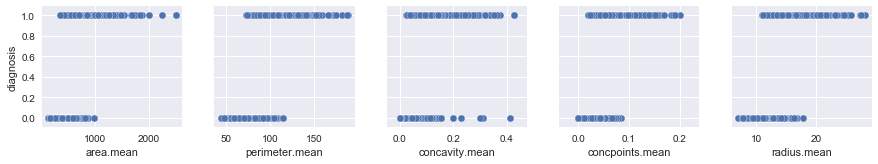

In [14]:
# Using seaborn to make pairplots for Diagnosis(target class) vs X (one feature at a time)
import seaborn as sns
sns.set()
sns.pairplot(data, y_vars=['diagnosis'],x_vars=['area.mean','perimeter.mean','concavity.mean','concpoints.mean','radius.mean'],palette="husl")

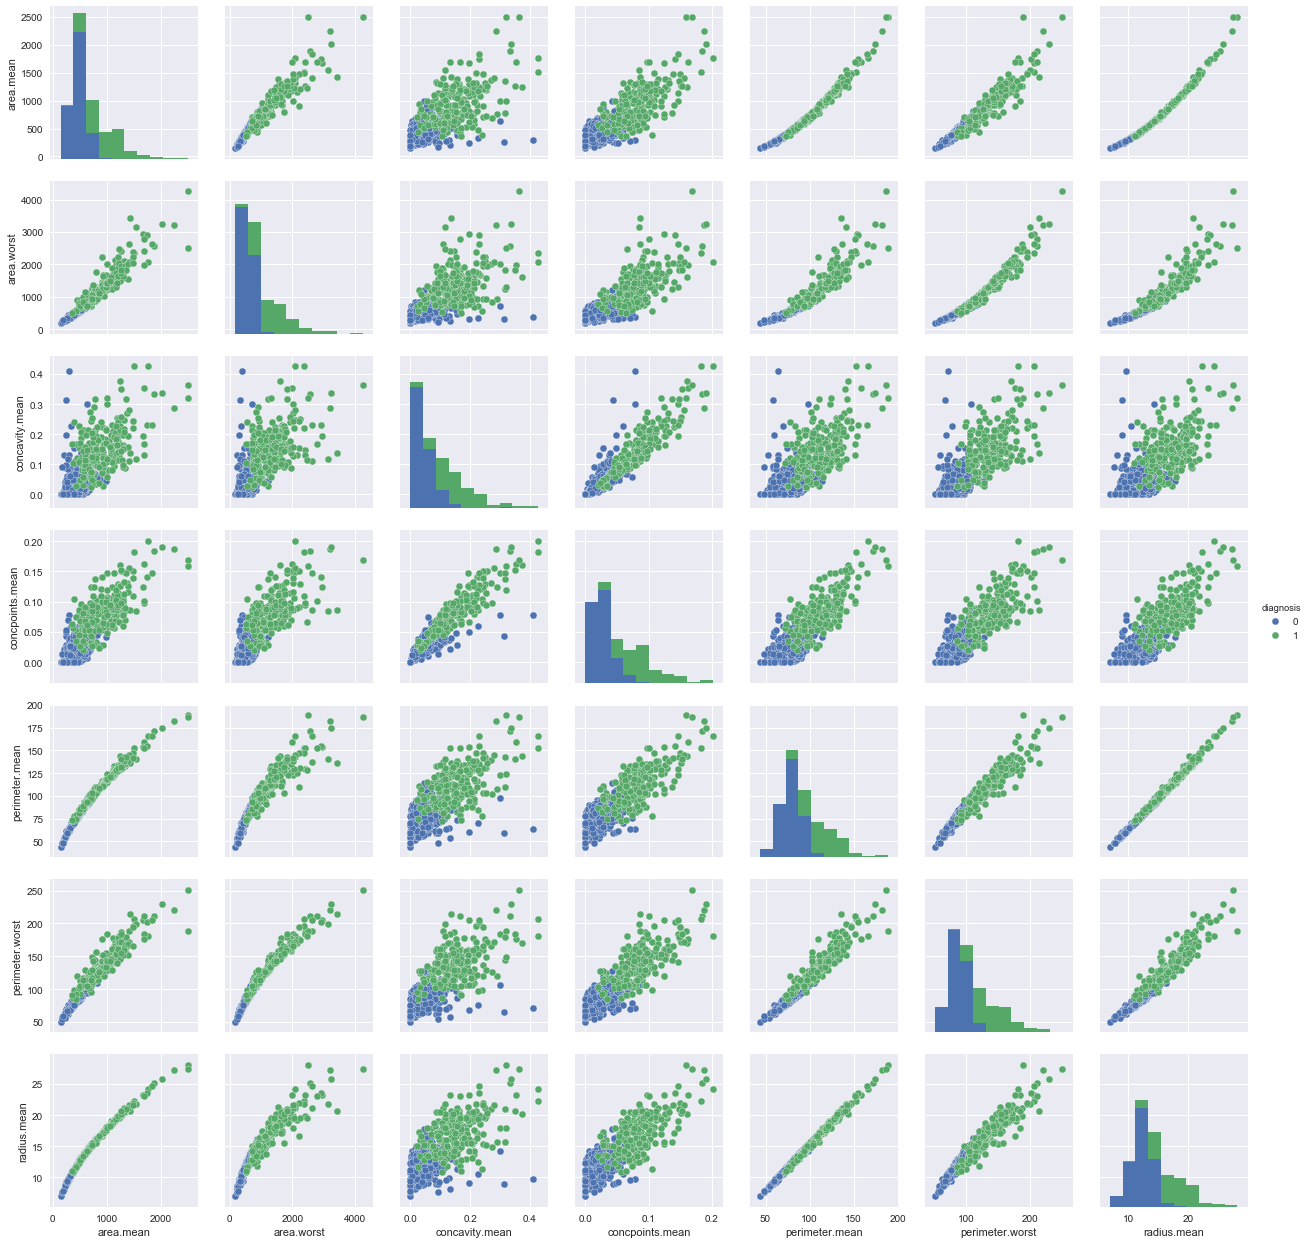

In [15]:
# Checking how the target class is distributed for some of the highly correlated features.

g = sns.pairplot(data, x_vars=['area.mean',"area.worst",'concavity.mean','concpoints.mean',
                               'perimeter.mean','perimeter.worst','radius.mean'],
                 y_vars=['area.mean',"area.worst",'concavity.mean','concpoints.mean',
                         'perimeter.mean','perimeter.worst','radius.mean'],hue="diagnosis")

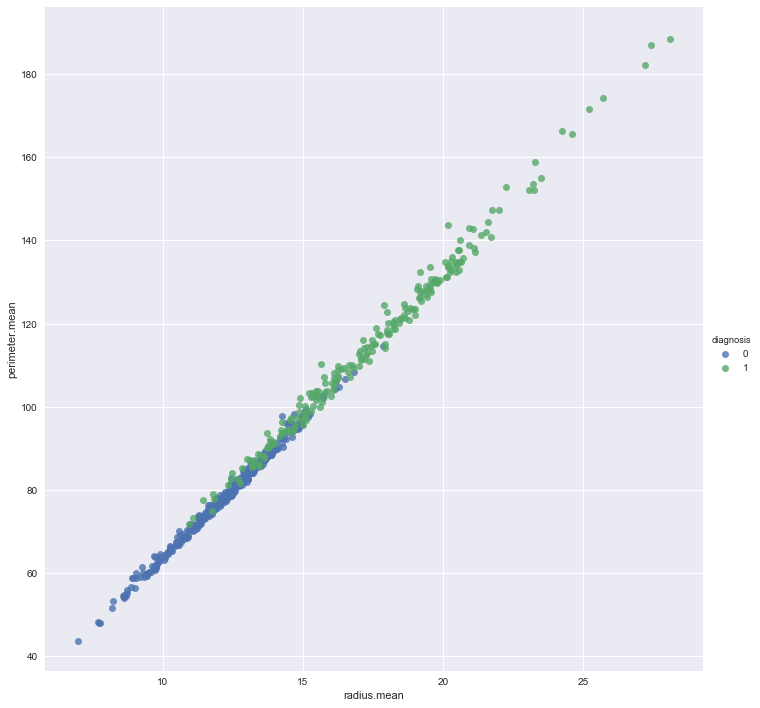

In [16]:
# Plotting radius.mean against perimeter.mean (Highly correlated to diagnosis)

g = sns.lmplot('radius.mean','perimeter.mean',data=data,hue='diagnosis',fit_reg=False,size=10)



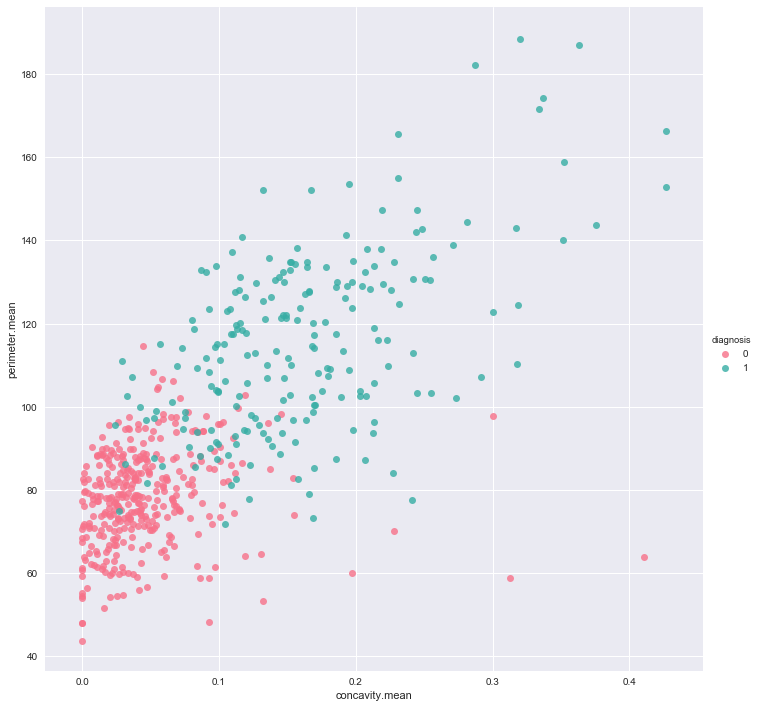

In [17]:
# Plotting Concavity.mean against Perimeter.mean (Highly correlated to diagnosis)

g = sns.lmplot('concavity.mean','perimeter.mean',data=data,hue='diagnosis',fit_reg=False,size=10,palette='husl')


### Decision Boundary 

#### K Nearest Neighbor

In [18]:
# Scaling features as the appear to be on a different scale.

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


def scaleColumns(df, cols_to_scale):
    """
    Takes in a dataframe and the columns you want to scale.
    Returns the dataframe with scaled columns.
    """
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(X[col])),columns=[col])
    return df

In [19]:
Y = data.diagnosis

In [20]:
#Choosing two features for plotting decision boundary. 
X = data[['radius.mean','perimeter.mean']] # Radius and Perimeter are highly correlated to the target class.
X = scaleColumns(X,X.columns) # scaling columns to standardize results.

clf = KNeighborsClassifier(n_neighbors=4) # Deploying KNN with K=4
clf = clf.fit(X,Y)

In [21]:
def decision_region(X,a,b):
    """
    Takes in the dataframe with two features a and b.
    Returns the grid for plotting decision boundary.   
    """
    dx = X[a].max() - X[a].min()
    dy = X[b].max() - X[b].min()
    x_min, x_max = X[a].min() - dx*0.1, X[a].max() + dx*0.1
    y_min, y_max = X[b].min() - dy*0.1, X[b].max() + dy*0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),  
                         np.linspace(y_min, y_max, 100))  # create a mesh to plot in
    return xx,yy

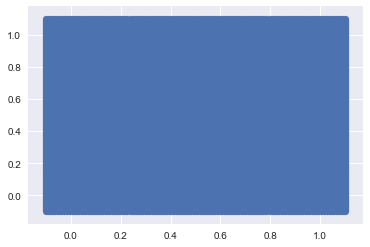

In [22]:
xx,yy = decision_region(X,'radius.mean','perimeter.mean')
plt.scatter(xx,yy)

In [23]:
def decision_boundary(clf,xx,yy,Y,a,b):
    """
    Takes in the classifier object for the model, the grid for plotting decision bpundary, Target class and two features.
    Plots decision boundary.
    """
    
    #Plot the decision boundary. For that, we assign a color to each 
    #point in the mesh [x_min, m_max]x[y_min, y_max].
    
    Yhat = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    Yhat = Yhat.reshape(xx.shape) # Put the result into a color plot
    
    plt.figure(figsize=(16,7))
    plt.pcolormesh(xx, yy, Yhat, cmap=cmap_light)
    plt.scatter(X[a], X[b], c=Y, cmap="Spectral",
               edgecolor='k', s=45)
    #sns.lmplot(X[a],X[b],hue=Y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

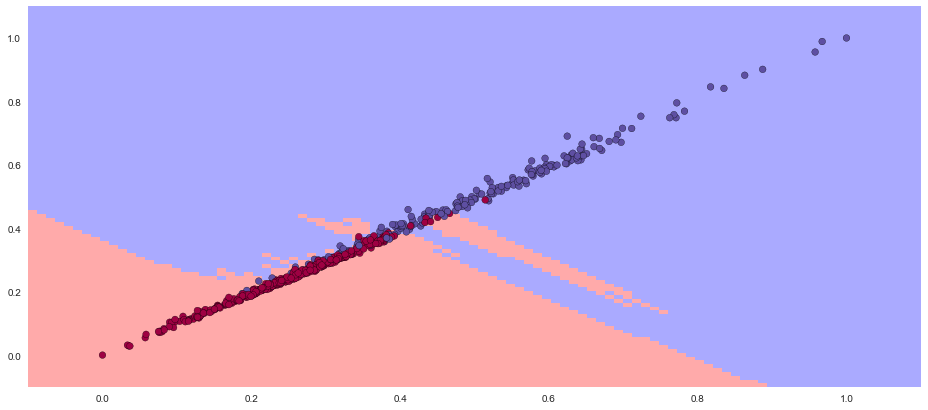

In [24]:
# Plotting decision boundary for Radius and Perimeter for KNN K = 4.
decision_boundary(clf,xx,yy,Y,'radius.mean','perimeter.mean') 

In [25]:
Yhat = clf.predict(X)
accuracy_score(Yhat,Y)*100

92.09138840070298

KNN fits the data pretty well and probably overfits as we can see it captures noise (The red region in the blue region for a few red points). It report an accuracy of 92%

#### Logistic Regression

In [26]:
clf_LR = LogisticRegression()
clf_LR.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

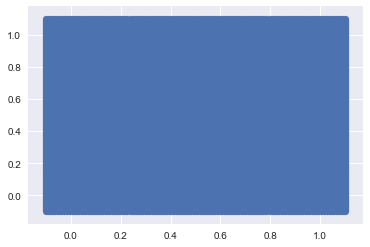

In [27]:
xx,yy = decision_region(X,'radius.mean','perimeter.mean') # Preparing mesh grid for plotting.
plt.scatter(xx,yy)

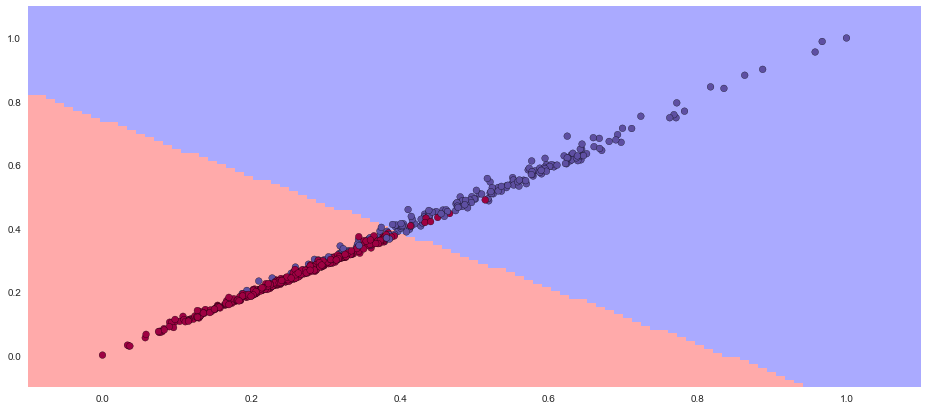

In [28]:
decision_boundary(clf_LR,xx,yy,Y,'radius.mean','perimeter.mean') # Plotting for same variables for Logistic Regression

In [29]:
Yhat = clf_LR.predict(X)
accuracy_score(Yhat,Y)*100

88.57644991212655

We can see that Logistic Regression also draws a pretty clean decision bondary but is not sensetive to noise like KNN. It however has less accuracy than KNN

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

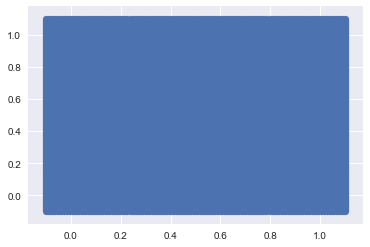

In [30]:
#Checking for other features which are highly correlated to the target class for Logistic Regression.

a = 'concavity.mean'
b = 'perimeter.mean'
X =data[[a,b]] # Subsetting a and b from data and defining into X.
X = scaleColumns(X,X.columns) # Scaling columns.

xx,yy = decision_region(X,a,b) # Preparing meshgrid
plt.scatter(xx,yy)


clf_LR_1 = LogisticRegression()  # Instantiating a Logistic Regression Classifier
clf_LR_1.fit(X,Y)

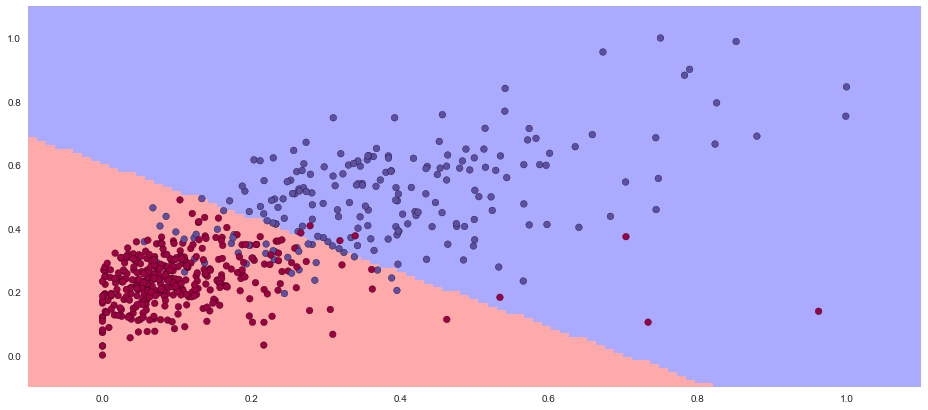

In [31]:
# Plotting decision boundary
decision_boundary(clf_LR_1,xx,yy,Y,'concavity.mean','perimeter.mean')

In [32]:
Yhat = clf_LR_1.predict(X)
accuracy_score(Yhat,Y)*100

91.56414762741653

#### Feature Engineering 

In [33]:
# Define new engineered mathematical features such as square and product.

X['concavity.mean_sq']=np.square(X['concavity.mean']) # Square of concavity.mean
X['perimeter.mean_sq'] = np.square(X['perimeter.mean']) # Square of perimeter.mean
X["concavity.perimeter"]=np.multiply(X['concavity.mean'],X['perimeter.mean']) # concavity * perimeter
X['concavity.mean_log']=np.log(X['concavity.mean']) # log of concavity.mean
X['perimeter.mean_log']=np.log(X['perimeter.mean']) # log of perimeter.mean

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


In [34]:
X.head()

,concavity.mean,perimeter.mean,concavity.mean_sq,perimeter.mean_sq,concavity.perimeter,concavity.mean_log,perimeter.mean_log
0,0.703140,0.545989,0.494405,0.298103,0.383906,-0.352200,-0.605157
1,0.203608,0.615783,0.041456,0.379189,0.125379,-1.591557,-0.484860
2,0.462512,0.595743,0.213917,0.354910,0.275538,-0.771083,-0.517946
3,0.565604,0.233501,0.319908,0.054523,0.132069,-0.569860,-1.454567
4,0.463918,0.630986,0.215219,0.398143,0.292726,-0.768048,-0.460471


In [35]:
clf_feature_eng = LogisticRegression() # Fitting Logistic Regression to these features

In [36]:
# Removing infinte values from log(feature) and replacing it with Zero.
X[np.isneginf(X['concavity.mean_log'])] = 0
np.isfinite(X).sum()

concavity.mean         569
perimeter.mean         569
concavity.mean_sq      569
perimeter.mean_sq      569
concavity.perimeter    569
concavity.mean_log     569
perimeter.mean_log     569
dtype: int64

In [37]:
# Chossing square of both the features and the product along with original x and y.

X_feature_eng = X[['concavity.mean','perimeter.mean','concavity.perimeter','concavity.mean_sq','perimeter.mean_sq']] # Subsetting features from X

In [38]:
clf_feature_eng.fit(X_feature_eng,Y) # Fitting logistic model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

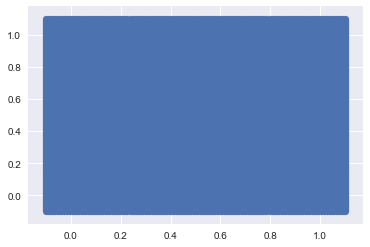

In [39]:
xx,yy = decision_region(X_feature_eng,'concavity.mean','perimeter.mean') # Grid for x and y
plt.scatter(xx,yy)

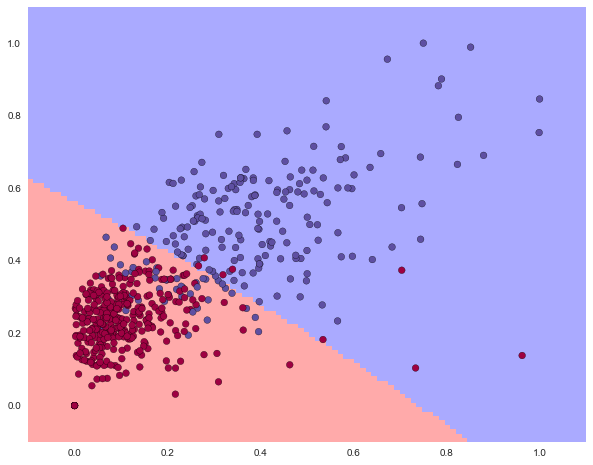

In [40]:
# Decision Boundary for feature engineering

# Performing operation on grid
W = xx*yy
Z = xx**2
Q = yy**2

# Predicting for engineered features
Yhat = clf_feature_eng.predict(np.c_[xx.ravel(), yy.ravel(), W.ravel(), Z.ravel(), Q.ravel()]) 

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
Yhat = Yhat.reshape(xx.shape) # Put the result into a color plot by reshaping it back to xx.shape
    
plt.figure(figsize=(10,8))
plt.pcolormesh(xx, yy, Yhat, cmap=cmap_light)
plt.scatter(X[a], X[b], c=Y, cmap="Spectral",edgecolor='k', s=45)
   
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [41]:
Yhat = clf_feature_eng.predict(X_feature_eng)
accuracy_score(Yhat,Y)*100

91.21265377855887

We know that by adding new engineered features the variance has increased and this is shown by a sligh curve in the decision boundary. The accuracy dips very slightly and there is not much change observed.

In [42]:
# Adding new mathematical features for x and y -- x**3 and y**3

In [43]:
X['concavity.mean_cube']=np.power(X['concavity.mean'],3)  # Cube of x

In [44]:
X['perimeter.mean_cube']=np.power(X['perimeter.mean'],3)  # Cube of y

In [45]:
# Fitting a Logistic model on all engineered features including new cube ones.

clf_feature_eng_all = LogisticRegression()
X_feature_eng_more = X[['concavity.mean','perimeter.mean','concavity.perimeter','concavity.mean_sq','perimeter.mean_sq','concavity.mean_cube','perimeter.mean_cube']]
clf_feature_eng_all.fit(X_feature_eng_more,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

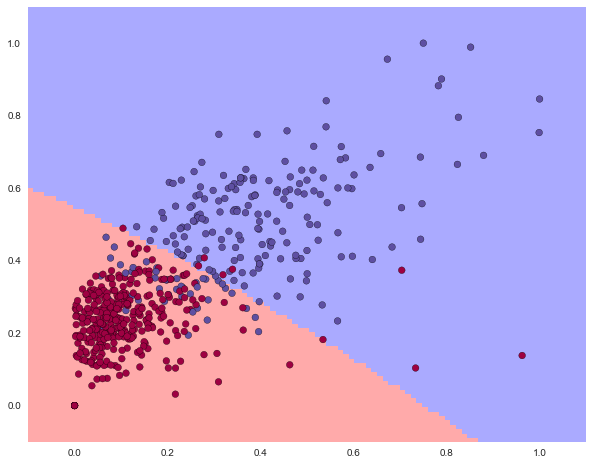

In [46]:
# Decision boundary for all new features.

# Performing operations on grid
W = xx*yy
Z = xx**2
Q = yy**2
L=xx**3
L2 = yy**3

# Predicting for all features on the grid
Yhat = clf_feature_eng_all.predict(np.c_[xx.ravel(), yy.ravel(), W.ravel(), Z.ravel(), Q.ravel(), L.ravel(), L2.ravel()]) 

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
Yhat = Yhat.reshape(xx.shape) # Reshaping to plot
    
plt.figure(figsize=(10,8))
plt.pcolormesh(xx, yy, Yhat, cmap=cmap_light)
plt.scatter(X[a], X[b], c=Y, cmap="Spectral",edgecolor='k', s=45)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [47]:
Yhat = clf_feature_eng_all.predict(X_feature_eng_more)
accuracy_score(Yhat,Y)*100

91.21265377855887

We again see a slight curve which is prominent than before in the decision boundary because of high variance on adding features.

### Use the full data 

#### K Fold Cross Validation

In [48]:
def KFolds_CV(data,nfolds=10,lambda_value=1,print_ticker=False):
    """
    Takes in dataset and performs nfolds k fold cross validation and reports
    accuracy, precision and recall for each nfold.
    Returns a tuple of mean score metrics.
    """
    results=[]
    nrows = data.shape[0] # Number of observations
    
    set_nrows = np.floor(nrows/nfolds) # Size of each fold
   
    indexes = np.array(data.index) #get all the indexes
    
    np.random.shuffle(indexes)
     
    accuracy = []
    precision_list = []
    recall_list = []
    
    # Split the data into nfolds.
    for i in range(0,nfolds):

        start_ind = int(i*set_nrows)
        end_ind = int(start_ind + set_nrows)
        
        # Print the Ticker for every fold
        if print_ticker:
            print("#")
            print("Fold : ",i+1," Start Time", start_ind ,"End Time",end_ind)
        
        test_indexes = indexes[start_ind:end_ind]
        test_data = data.ix[test_indexes,:]
        train_data = data.ix[~data.index.isin(test_indexes),:]
        
        if print_ticker:
            print("Train Observations:" , train_data.shape[0], "Test Observations:", test_data.shape[0])
        
        # Defining Ytrain, Xtrain, Ytest, Xtest
        YTrain = train_data['diagnosis']
        XTrain = train_data.drop('diagnosis',axis=1)
        YTest = test_data['diagnosis']
        XTest = test_data.drop('diagnosis',axis=1)
        
        #Fitting Logistic Regression model
        clf = LogisticRegression(C=1/lambda_value)
        clf.fit(XTrain,YTrain)
        Yhat = clf.predict(XTest)
        
        #Calculating metrics for each fold
        acc = accuracy_score(YTest,Yhat)
        precision = precision_score(YTest,Yhat)
        recall = recall_score(YTest,Yhat)
        
        #Printing metrics for each fold
        if print_ticker:
            print('Accuracy Score :', acc)
            print('Precision Score :', precision)
            print('Recall Score :', recall)
        
        #Append in respective lists to calculate mean later
        accuracy.append(acc)
        precision_list.append(precision)
        recall_list.append(recall)
    results.append(round(np.mean(accuracy)*100,2))
    results.append(np.mean(precision_list))
    results.append(np.mean(recall_list))
    results.append(lambda_value)
    
    if print_ticker:
        print('\n')
        print('Mean Scores')
        print('Accuracy',round(np.mean(accuracy)*100,2),"%",'Precision',np.mean(precision_list),'Recall',np.mean(recall_list))
    return results

In [49]:
KFolds_CV(data,10,print_ticker=True)

#
Fold :  1  Start Time 0 End Time 56
Train Observations: 513 Test Observations: 56
Accuracy Score : 0.9642857142857143
Precision Score : 0.9
Recall Score : 1.0
#
Fold :  2  Start Time 56 End Time 112
Train Observations: 513 Test Observations: 56
Accuracy Score : 0.9642857142857143
Precision Score : 1.0
Recall Score : 0.8888888888888888
#
Fold :  3  Start Time 112 End Time 168
Train Observations: 513 Test Observations: 56
Accuracy Score : 0.9285714285714286
Precision Score : 0.9375
Recall Score : 0.8333333333333334
#
Fold :  4  Start Time 168 End Time 224
Train Observations: 513 Test Observations: 56
Accuracy Score : 0.9285714285714286
Precision Score : 0.9230769230769231
Recall Score : 0.8
#
Fold :  5  Start Time 224 End Time 280
Train Observations: 513 Test Observations: 56
Accuracy Score : 0.9285714285714286
Precision Score : 0.8695652173913043
Recall Score : 0.9523809523809523
#
Fold :  6  Start Time 280 End Time 336
Train Observations: 513 Test Observations: 56
Accuracy Score : 0.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[95.54, 0.9590142140468227, 0.9147897521581733, 1]

### Regularization 

In [50]:
# Scaling data

X = data.drop('diagnosis',axis=1)
scaled_data = scaleColumns(X,X.columns)
scaled_data['diagnosis']=Y

In [51]:
# define a list of c values.
lambda_values = np.logspace(-6,6,20)
lambda_values

array([1.00000000e-06, 4.28133240e-06, 1.83298071e-05, 7.84759970e-05,
       3.35981829e-04, 1.43844989e-03, 6.15848211e-03, 2.63665090e-02,
       1.12883789e-01, 4.83293024e-01, 2.06913808e+00, 8.85866790e+00,
       3.79269019e+01, 1.62377674e+02, 6.95192796e+02, 2.97635144e+03,
       1.27427499e+04, 5.45559478e+04, 2.33572147e+05, 1.00000000e+06])

In [52]:
# Taking Ridge as the regularization type.

regularization_results_ridge = []

for i in lambda_values:
    regularization_results_ridge.append(KFolds_CV(scaled_data,10,lambda_value=i)) # Computing acc_score, precision and recall for all values of lambda for all values of k
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
# Convert to a dataframe to visualize results.
kfold_regularization_result_ridge = pd.DataFrame(regularization_results_ridge,
                                                 columns=['acc_score','precision',
                                                          'recall','lambda'])

In [54]:
# Inspect results
print(kfold_regularization_result_ridge.shape)
kfold_regularization_result_ridge


(20, 4)


,acc_score,precision,recall,lambda
0,95.89,0.934750,0.958002,0.000001
1,94.29,0.911160,0.943571,0.000004
2,95.89,0.938636,0.952741,0.000018
3,96.61,0.958967,0.950503,0.000078
4,96.79,0.954164,0.961840,0.000336
5,96.61,0.970261,0.942384,0.001438
6,97.32,0.978047,0.955258,0.006158
7,97.68,0.984594,0.949820,0.026367
8,97.68,0.995652,0.943253,0.112884
9,96.43,0.978245,0.921526,0.483293


In [55]:
#kfold_regularization_result_ridge.sort_values(by='acc_score',ascending=False).head()

The best value of Lambda is at 0.006 which reports an accuracy of 97.8%

In [56]:
# Plotting lambda values against the accuracy score.

In [57]:
kfold_regularization_result_ridge.loc[:,'precision'] *= 100
kfold_regularization_result_ridge.loc[:,'recall'] *= 100

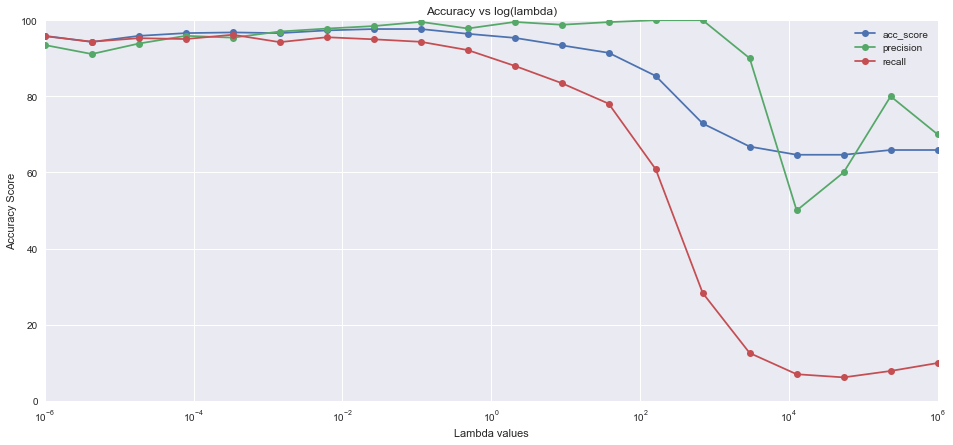

In [58]:
plt.figure(figsize=(16,7))
plt.plot(kfold_regularization_result_ridge['lambda'],kfold_regularization_result_ridge['acc_score'],marker='o')
plt.plot(kfold_regularization_result_ridge['lambda'],kfold_regularization_result_ridge['precision'],marker='o')
plt.plot(kfold_regularization_result_ridge['lambda'],kfold_regularization_result_ridge['recall'],marker='o')
    
plt.ylim([0, 100])
plt.xlim([0.000001, 1000000])
plt.xlabel('Lambda values')
plt.xscale('log')
plt.ylabel('Accuracy Score')
#plt.legend(loc="lower right")
plt.title('Accuracy vs log(lambda)')
plt.legend()
plt.show()

### ROC Curve : Which estimator is the best

#### Logistic Regression - ROC Curves

In [63]:
def calculate_fpr_tpr(data):
    """
    Calculates False Postive rate and True Postive rate for a set of classifiers and 
    plots the ROC curve based on these rates.
    """
    X=data.drop('diagnosis',axis=1) # define X features
    Y = data.diagnosis # define target class

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=2) # split data into 1/3
    
    #Defining classifiers
    clf_logistic = LogisticRegression(C=1000) # Logistic model with best value of lambda
    # Checking for three values of K
    clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
    clf_knn_5 = KNeighborsClassifier(n_neighbors=5)
    clf_knn_15 = KNeighborsClassifier(n_neighbors=15)
    clf_naivebayes = GaussianNB()
    
    classifers = [clf_logistic,clf_knn_1,clf_knn_5,clf_knn_15,clf_naivebayes]  
    
    plt.figure(figsize=(16,7)) 
    
    #Iterating on classifiers
    for clf in classifers:
        
        clf.fit(X_train,y_train)
        Yhat = clf.predict_proba(X_test)[:,1]
        thresholds = np.linspace(0,1,num=20) # Defining a list of thresholds
        fpr_list = []
        tpr_list = []
        #Iterating on thresholds
        for threshold in thresholds:
            tpr = sum(np.logical_and((Yhat >= threshold) == True, y_test == 1))/sum(y_test)
            tpr_list.append(tpr)
            fpr = sum(np.logical_and((Yhat >= threshold) == True, y_test == 0))/(len(y_test) - sum(y_test))
            fpr_list.append(fpr)
        print(tpr_list)
        print(fpr_list)
        #plotting for each classifier on the same graph
        plt.plot(fpr_list, tpr_list,lw=2)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(labels=['Logistic Regression','Naive Bayes','KNN with K=1','KNN with K=5','KNN with K=15'])
    plt.show()

[1.0, 0.9726027397260274, 0.9726027397260274, 0.9726027397260274, 0.9726027397260274, 0.9726027397260274, 0.9726027397260274, 0.9726027397260274, 0.9726027397260274, 0.9726027397260274, 0.958904109589041, 0.958904109589041, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9452054794520548, 0.9315068493150684, 0.1917808219178082]
[1.0, 0.10434782608695652, 0.08695652173913043, 0.06086956521739131, 0.043478260869565216, 0.043478260869565216, 0.034782608695652174, 0.034782608695652174, 0.034782608695652174, 0.017391304347826087, 0.017391304347826087, 0.017391304347826087, 0.008695652173913044, 0.008695652173913044, 0.008695652173913044, 0.008695652173913044, 0.008695652173913044, 0.008695652173913044, 0.0, 0.0]
[1.0, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630137, 0.863013698630

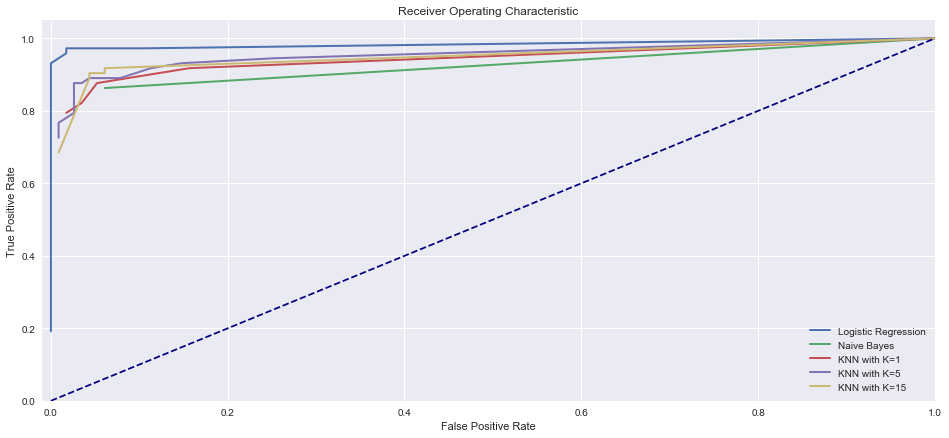

In [64]:
calculate_fpr_tpr(data)

Logistic model is the best as it has has the highest area under the curve and is distinctly visible close to the axis than the others. naive Bayes performs the worst. KNN performs the best with K=15 and the worst with K=1.